# Zoe Pesce | MISM 3403 | Database Lab Work | DLZHP LLC Property Management Database

# Requirements:
The DLZHP LLC Property Management Database will capture data about the following:

For each building owned: a building ID (unique), building address, building number of floors, price building was purchased at, year building was purchased, year building was built, building age (derived from year built and current date)

For each Apartment: a AptNo (partially unique, i.e., unique within a building), apartment number of bedrooms, apartment total rooms, rent amount

For each Tenant: a Tenant ID (unique), Tenant Full Name (composed of Tenant First Name and Tenant Last Name), multiple Tenant phone numbers, Tenant birthday, Tenant age (derived from tenant birthday and current date)

For each Building Manager: a Manager ID (unique), Manager Full Name (composed of Manager First Name and Manager Last Name), Manager Birthday, Manager Age (derived from manager birthday and current date), Manager salary, Manager bonus (optional), multiple manager phone numbers

For each building inspector: an Inspector ID (unique), Inspector full name (composed of inspector first name and inspector last name)

Each building has one or more apartments. 
Each apartment is located in exactly one building.

Each apartment is leased to one or many tenants or it can be leased to none.
Each tenant leases one or many apartments.

Each building is managed by exactly one manager.
Each manager manages one or many buildings.

Each manager resides in exactly one building.
Each building has one manager residing in it or no managers residing in it. 

Each inspector inspects one or many buildings.
Each building is inspected by one or many inspectors.

For each building that a particular inspector inspects, the dates of the last inspection and the date of the next future inspection by the inspector are recorded.

For each apartment a tenant leases, the Tenant's move in date and the Tenant's lease term date are recorded.

# ER Diagram:
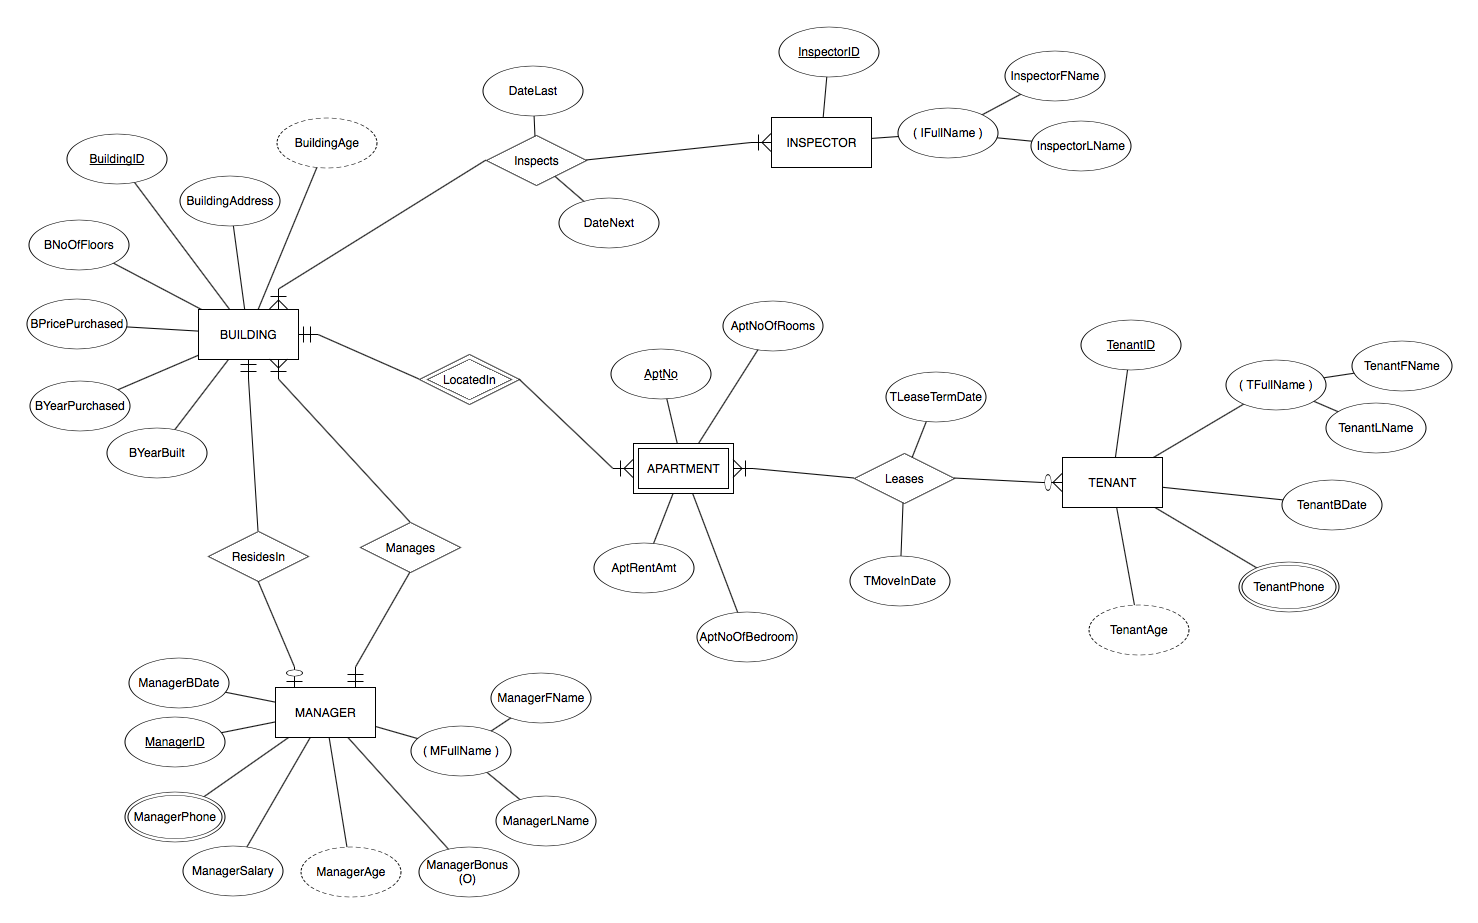

# Relational Schema:
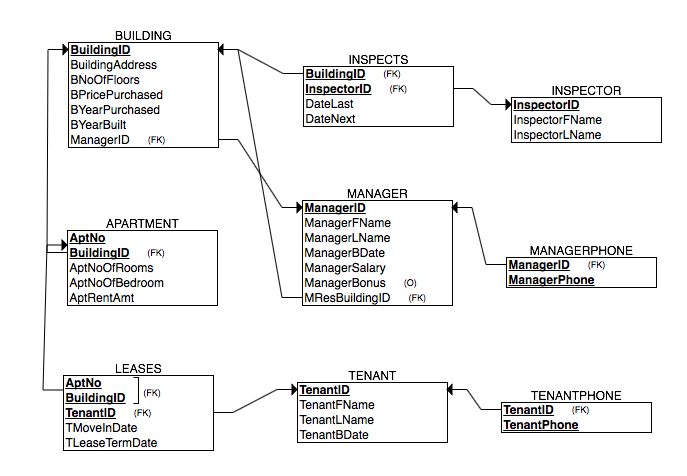

# Code:
Have Python connect to mySQL and create schema

In [1]:
import pymysql.cursors
import pymysql

In [2]:
dsn_database = "neu_student"
dsn_hostname = "96.86.105.41"
dsn_port = 3306
dsn_uid = "neu"
dsn_pwd = "test"

In [3]:
conn = pymysql.connect(host=dsn_hostname, port=dsn_port, user=dsn_uid, passwd=dsn_pwd, db=dsn_database)

In [4]:
conn.query("""DROP SCHEMA IF EXISTS neu_student_zoe_pesce_labwork""")
conn.query("""CREATE SCHEMA neu_student_zoe_pesce_labwork""")
conn.query("""USE neu_student_zoe_pesce_labwork""")

conn.query("""DROP TABLE IF EXISTS leases, tenantphone, tenant, apartment, inspects, inspector, building, managerphone, manager;""")

conn.query("""CREATE TABLE manager
(
  ManagerID VARCHAR(5) NOT NULL,
  ManagerFName VARCHAR(20) NOT NULL,
  ManagerLName VARCHAR(20) NOT NULL,
  ManagerBDate Date NOT NULL,
  ManagerSalary Decimal(10,2) NOT NULL,
  ManagerBonus Decimal(10,2),
  MResBuildingID VARCHAR(5),
  PRIMARY KEY (ManagerID)
)""")
conn.query("""CREATE TABLE managerphone
(
  ManagerID VARCHAR(5) NOT NULL,
  ManagerPhone VARCHAR(14) NOT NULL,
  PRIMARY KEY (ManagerID, ManagerPhone),
  FOREIGN KEY (ManagerID) REFERENCES manager(ManagerID)
)""")
conn.query("""CREATE TABLE building
(
  BuildingID VARCHAR(5) NOT NULL,
  BuildingAddress VARCHAR(60) NOT NULL,
  BNoOfFloors INT NOT NULL,
  BPricePurchased Decimal(10,2) NOT NULL,
  BYearPurchased Int NOT NULL,
  BYearBuilt INT NOT NULL,
  ManagerID VARCHAR(5) NOT NULL,
  PRIMARY KEY (BuildingID),
  FOREIGN KEY (ManagerID) REFERENCES manager(ManagerID)
)""")
conn.query("""CREATE TABLE inspector
(
  InspectorID VARCHAR(5) NOT NULL,
  InspectorFName VARCHAR(20) NOT NULL,
  InspectorLName VARCHAR(20) NOT NULL,
  PRIMARY KEY (InspectorID)
)""")
conn.query("""CREATE TABLE inspects
(
  BuildingID VARCHAR(5) NOT NULL,
  InspectorID VARCHAR(5) NOT NULL,
  DateLast Date NOT NULL,
  DateNext Date NOT NULL,
  PRIMARY KEY (BuildingID, InspectorID),
  FOREIGN KEY (BuildingID) REFERENCES building(BuildingID),
  FOREIGN KEY (InspectorID) REFERENCES inspector(InspectorID)
)""")
conn.query("""CREATE TABLE apartment
(
  BuildingID VARCHAR(5) NOT NULL,
  AptNo INT NOT NULL,
  AptNoOfRooms INT NOT NULL,
  AptNoOfBedroom INT NOT NULL,
  AptRentAmt Decimal(10,2) NOT NULL,
  PRIMARY KEY (BuildingID, AptNo),
  FOREIGN KEY (BuildingID) REFERENCES building(BuildingID)
)""")
conn.query("""CREATE TABLE tenant
(
  TenantID VARCHAR(5) NOT NULL,
  TenantFName VARCHAR(20) NOT NULL,
  TenantLName VARCHAR(20) NOT NULL,
  TenantBDate Date NOT NULL,
  PRIMARY KEY (TenantID)
)""")
conn.query("""CREATE TABLE tenantphone
(
  TenantID VARCHAR(5) NOT NULL,
  TenantPhone VARCHAR(14) NOT NULL,
  PRIMARY KEY (TenantID, TenantPhone),
  FOREIGN KEY (TenantID) REFERENCES tenant(TenantID)
)""")
conn.query("""CREATE TABLE leases
(
  BuildingID VARCHAR(5) NOT NULL,
  AptNo INT NOT NULL,
  TenantID VARCHAR(5) NOT NULL,
  TMoveInDate Date NOT NULL,
  TLeaseTermDate Date NOT NULL,
  PRIMARY KEY (BuildingID, AptNo, TenantID),
  FOREIGN KEY (BuildingID, AptNo) REFERENCES apartment(BuildingID, AptNo),
  FOREIGN KEY (TenantID) REFERENCES tenant(TenantID)
)""")

0

Insert values into Tables

In [5]:
conn.query("""INSERT INTO manager (ManagerID, ManagerFName, ManagerLName, ManagerBDate, ManagerSalary, ManagerBonus) VALUES('M1','Tony','Hernandez','1979-06-10',73000.00,2500.00)""")
conn.query("""INSERT INTO manager (ManagerID, ManagerFName, ManagerLName, ManagerBDate, ManagerSalary, MResBuildingID) VALUES('M2','Dan','Pesce','1966-08-24',105000.00,'B1')""")
conn.commit()

In [6]:
conn.query("""INSERT INTO managerphone VALUES('M1','212-555-0810')""")
conn.query("""INSERT INTO managerphone VALUES('M1','212-555-1738')""")
conn.query("""INSERT INTO managerphone VALUES('M2','914-555-2555')""")
conn.query("""INSERT INTO managerphone VALUES('M2','914-555-6063')""")
conn.query("""INSERT INTO managerphone VALUES('M2','914-555-6510')""")
conn.commit()

In [7]:
conn.query("""INSERT INTO building VALUES('B1','30 Downing St. New York, NY 10014',6,2000000.00,2002,1901,'M2')""")
conn.query("""INSERT INTO building VALUES('B2','3242 Middletown Rd. Bronx, NY 10465',4,350000.00,1995,1932,'M1')""")
conn.query("""INSERT INTO building VALUES('B3','3244 Middletown Rd. Bronx, NY 10465',4,300000.00,1993,1932,'M1')""")
conn.query("""INSERT INTO building VALUES('B4','1628 Kennelworth Pl. Bronx, NY 10465',4,550000.00,2007,1921,'M1')""")
conn.query("""INSERT INTO building VALUES('B5','1634 Kennelworth Pl. Bronx, NY 10465',2,250000.00,2008,1947,'M1')""")
conn.query("""INSERT INTO building VALUES('B6','3268 Middletown Rd. Bronx, NY 10465',3,480000.00,2006,1935,'M1')""")
conn.commit()

In [8]:
conn.query("""INSERT INTO inspector VALUES('I1','John','Peabody')""")
conn.query("""INSERT INTO inspector VALUES('I2','Ralph','Eames')""")
conn.query("""INSERT INTO inspector VALUES('I3','Anthony','Zaro')""")
conn.commit()

In [9]:
conn.query("""INSERT INTO inspects VALUES('B1','I3','2017-03-15','2018-05-15')""")
conn.query("""INSERT INTO inspects VALUES('B2','I1','2017-04-01','2018-06-08')""")
conn.query("""INSERT INTO inspects VALUES('B3','I2','2017-02-15','2018-07-10')""")
conn.query("""INSERT INTO inspects VALUES('B4','I2','2017-08-17','2018-09-20')""")
conn.query("""INSERT INTO inspects VALUES('B5','I1','2017-10-26','2018-11-15')""")
conn.query("""INSERT INTO inspects VALUES('B6','I1','2017-09-18','2018-09-20')""")
conn.commit()

In [10]:
conn.query("""INSERT INTO apartment VALUES('B1',1,2,1,2500.00)""")
conn.query("""INSERT INTO apartment VALUES('B1',2,2,1,2500.00)""")
conn.query("""INSERT INTO apartment VALUES('B1',3,4,1,4500.00)""")
conn.query("""INSERT INTO apartment VALUES('B1',4,6,2,6500.00)""")
conn.query("""INSERT INTO apartment VALUES('B2',1,5,2,1600.00)""")
conn.query("""INSERT INTO apartment VALUES('B2',2,4,1,1250.00)""")
conn.query("""INSERT INTO apartment VALUES('B2',3,4,1,1200.00)""")
conn.query("""INSERT INTO apartment VALUES('B2',4,4,1,1250.00)""")
conn.query("""INSERT INTO apartment VALUES('B2',5,4,1,1475.00)""")
conn.query("""INSERT INTO apartment VALUES('B2',6,5,2,1600.00)""")
conn.query("""INSERT INTO apartment VALUES('B2',7,2,1,850.00)""")
conn.query("""INSERT INTO apartment VALUES('B3',1,6,2,1500.00)""")
conn.query("""INSERT INTO apartment VALUES('B3',2,4,1,1400.00)""")
conn.query("""INSERT INTO apartment VALUES('B3',3,4,1,1200.00)""")
conn.query("""INSERT INTO apartment VALUES('B3',4,4,1,1250.00)""")
conn.query("""INSERT INTO apartment VALUES('B3',5,4,1,950.00)""")
conn.query("""INSERT INTO apartment VALUES('B3',6,3,1,1300.00)""")
conn.query("""INSERT INTO apartment VALUES('B3',7,2,1,1100.00)""")
conn.query("""INSERT INTO apartment VALUES('B4',1,7,3,1800.00)""")
conn.query("""INSERT INTO apartment VALUES('B4',2,7,3,2000.00)""")
conn.query("""INSERT INTO apartment VALUES('B4',3,5,2,1600.00)""")
conn.query("""INSERT INTO apartment VALUES('B4',4,5,2,1750.00)""")
conn.query("""INSERT INTO apartment VALUES('B5',1,3,1,1500.00)""")
conn.query("""INSERT INTO apartment VALUES('B5',2,3,1,1300.00)""")
conn.query("""INSERT INTO apartment VALUES('B6',1,6,2,1600.00)""")
conn.query("""INSERT INTO apartment VALUES('B6',2,5,2,1350.00)""")
conn.query("""INSERT INTO apartment VALUES('B6',3,3,1,1300.00)""")
conn.query("""INSERT INTO apartment VALUES('B6',4,2,1,1100.00)""")
conn.commit()

In [11]:
conn.query("""INSERT INTO tenant VALUES('T1','Andrew','Pesce','1992-06-05')""")
conn.query("""INSERT INTO tenant VALUES('T2','Hannah','Pesce','1998-06-10')""")
conn.query("""INSERT INTO tenant VALUES('T3','Dan','Pesce','1966-08-24')""")
conn.query("""INSERT INTO tenant VALUES('T4','Lucia','Pesce','1967-03-25')""")
conn.query("""INSERT INTO tenant VALUES('T5','Rebecca','Johnson','1985-07-06')""")
conn.query("""INSERT INTO tenant VALUES('T6','Catherine','Turlington','1984-02-03')""")
conn.query("""INSERT INTO tenant VALUES('T7','Debbie','Freedman','1970-04-21')""")
conn.query("""INSERT INTO tenant VALUES('T8','Vivian','Charles','1962-07-20')""")
conn.query("""INSERT INTO tenant VALUES('T9','Tim','Arnold','1967-12-30')""")
conn.query("""INSERT INTO tenant VALUES('T10','Rita','Wright','1968-05-10')""")
conn.query("""INSERT INTO tenant VALUES('T11','Chris','Lloyd','1988-09-13')""")
conn.query("""INSERT INTO tenant VALUES('T12','Bill','Rogers','1965-08-04')""")
conn.query("""INSERT INTO tenant VALUES('T13','Carol','Coscia','1955-03-16')""")
conn.query("""INSERT INTO tenant VALUES('T14','Yvonne','Snell','1963-04-07')""")
conn.query("""INSERT INTO tenant VALUES('T15','Colleen','Smith','1982-10-10')""")
conn.query("""INSERT INTO tenant VALUES('T16','Nicholas','Cruz','1985-10-20')""")
conn.query("""INSERT INTO tenant VALUES('T17','Rudy','Rose','1977-02-18')""")
conn.query("""INSERT INTO tenant VALUES('T18','Milton','Mason','1964-06-22')""")
conn.query("""INSERT INTO tenant VALUES('T19','Jennifer','Apple','1961-01-25')""")
conn.query("""INSERT INTO tenant VALUES('T20','Tony','Cooke','1976-01-27')""")
conn.query("""INSERT INTO tenant VALUES('T21','Ashley','Bloomberg','1958-01-18')""")
conn.query("""INSERT INTO tenant VALUES('T22','Lizbeth','Simpson','1974-06-12')""")
conn.query("""INSERT INTO tenant VALUES('T23','Mario','Dutti','1966-11-19')""")
conn.query("""INSERT INTO tenant VALUES('T24','Manual','Perry','1983-12-03')""")
conn.query("""INSERT INTO tenant VALUES('T25','George','Clark','1981-08-29')""")
conn.query("""INSERT INTO tenant VALUES('T26','Peter','Pan','1982-09-10')""")
conn.query("""INSERT INTO tenant VALUES('T27','Emily','Bell','1983-03-14')""")
conn.query("""INSERT INTO tenant VALUES('T28','Chris','Cooper','1986-05-04')""")
conn.commit()

In [12]:
conn.query("""INSERT INTO tenantphone VALUES('T1','212-555-3245')""")
conn.query("""INSERT INTO tenantphone VALUES('T2','914-555-6509')""")
conn.query("""INSERT INTO tenantphone VALUES('T2','212-555-2555')""")
conn.query("""INSERT INTO tenantphone VALUES('T3','914-555-6063')""")
conn.query("""INSERT INTO tenantphone VALUES('T3','914-555-2555')""")
conn.query("""INSERT INTO tenantphone VALUES('T3','914-555-6510')""")
conn.query("""INSERT INTO tenantphone VALUES('T4','914-555-6684')""")
conn.query("""INSERT INTO tenantphone VALUES('T4','914-555-2555')""")
conn.query("""INSERT INTO tenantphone VALUES('T5','413-555-5687')""")
conn.query("""INSERT INTO tenantphone VALUES('T5','212-555-8006')""")
conn.query("""INSERT INTO tenantphone VALUES('T6','796-555-3475')""")
conn.query("""INSERT INTO tenantphone VALUES('T6','212-555-7468')""")
conn.query("""INSERT INTO tenantphone VALUES('T7','948-555-9302')""")
conn.query("""INSERT INTO tenantphone VALUES('T8','738-555-2835')""")
conn.query("""INSERT INTO tenantphone VALUES('T9','934-555-1029')""")
conn.query("""INSERT INTO tenantphone VALUES('T9','212-555-3927')""")
conn.query("""INSERT INTO tenantphone VALUES('T10','832-555-6930')""")
conn.query("""INSERT INTO tenantphone VALUES('T11','938-555-4830')""")
conn.query("""INSERT INTO tenantphone VALUES('T11','212-555-2234')""")
conn.query("""INSERT INTO tenantphone VALUES('T12','349-555-7730')""")
conn.query("""INSERT INTO tenantphone VALUES('T13','834-555-3928')""")
conn.query("""INSERT INTO tenantphone VALUES('T13','212-555-8854')""")
conn.query("""INSERT INTO tenantphone VALUES('T14','254-555-6054')""")
conn.query("""INSERT INTO tenantphone VALUES('T14','212-555-5936')""")
conn.query("""INSERT INTO tenantphone VALUES('T15','530-555-3928')""")
conn.query("""INSERT INTO tenantphone VALUES('T16','720-555-3948')""")
conn.query("""INSERT INTO tenantphone VALUES('T17','648-555-2039')""")
conn.query("""INSERT INTO tenantphone VALUES('T18','182-555-3759')""")
conn.query("""INSERT INTO tenantphone VALUES('T19','134-555-2261')""")
conn.query("""INSERT INTO tenantphone VALUES('T19','212-555-7993')""")
conn.query("""INSERT INTO tenantphone VALUES('T20','453-555-3344')""")
conn.query("""INSERT INTO tenantphone VALUES('T20','212-555-9952')""")
conn.query("""INSERT INTO tenantphone VALUES('T21','326-555-1284')""")
conn.query("""INSERT INTO tenantphone VALUES('T22','372-555-0384')""")
conn.query("""INSERT INTO tenantphone VALUES('T23','843-555-3027')""")
conn.query("""INSERT INTO tenantphone VALUES('T23','212-555-0674')""")
conn.query("""INSERT INTO tenantphone VALUES('T24','947-555-0384')""")
conn.query("""INSERT INTO tenantphone VALUES('T24','212-555-0085')""")
conn.query("""INSERT INTO tenantphone VALUES('T25','382-555-3221')""")
conn.query("""INSERT INTO tenantphone VALUES('T25','212-555-4038')""")
conn.query("""INSERT INTO tenantphone VALUES('T26','418-555-6748')""")
conn.query("""INSERT INTO tenantphone VALUES('T27','418-555-9744')""")
conn.query("""INSERT INTO tenantphone VALUES('T28','638-555-9853')""")
conn.commit()

In [13]:
conn.query("""INSERT INTO leases VALUES('B1',1,'T1','2016-06-01','2018-06-01')""")
conn.query("""INSERT INTO leases VALUES('B1',2,'T2','2016-08-01','2018-08-01')""")
conn.query("""INSERT INTO leases VALUES('B1',3,'T3','2009-03-01','2019-03-01')""")
conn.query("""INSERT INTO leases VALUES('B1',4,'T3','2015-03-01','2019-03-01')""")
conn.query("""INSERT INTO leases VALUES('B1',4,'T4','2015-03-01','2019-03-01')""")
conn.query("""INSERT INTO leases VALUES('B2',1,'T5','2016-08-01','2018-08-01')""")
conn.query("""INSERT INTO leases VALUES('B2',2,'T6','2015-05-01','2018-05-01')""")
conn.query("""INSERT INTO leases VALUES('B2',3,'T7','2008-04-01','2019-04-01')""")
conn.query("""INSERT INTO leases VALUES('B2',4,'T8','2015-02-01','2019-02-01')""")
conn.query("""INSERT INTO leases VALUES('B2',5,'T9','2017-10-01','2018-10-01')""")
conn.query("""INSERT INTO leases VALUES('B2',6,'T10','2016-07-01','2018-07-01')""")
conn.query("""INSERT INTO leases VALUES('B2',7,'T11','2017-08-01','2018-08-01')""")
conn.query("""INSERT INTO leases VALUES('B3',1,'T12','2010-04-01','2019-04-01')""")
conn.query("""INSERT INTO leases VALUES('B3',2,'T13','2014-07-01','2018-07-01')""")
conn.query("""INSERT INTO leases VALUES('B3',3,'T14','2015-04-01','2019-04-01')""")
conn.query("""INSERT INTO leases VALUES('B3',4,'T15','2016-05-01','2018-05-01')""")
conn.query("""INSERT INTO leases VALUES('B3',5,'T16','2015-09-01','2018-09-01')""")
conn.query("""INSERT INTO leases VALUES('B3',6,'T17','2014-04-01','2019-04-01')""")
conn.query("""INSERT INTO leases VALUES('B3',7,'T18','2015-07-01','2018-07-01')""")
conn.query("""INSERT INTO leases VALUES('B4',1,'T19','2015-03-01','2019-03-01')""")
conn.query("""INSERT INTO leases VALUES('B4',2,'T20','2015-05-01','2018-05-01')""")
conn.query("""INSERT INTO leases VALUES('B4',3,'T21','2017-10-01','2018-10-01')""")
conn.query("""INSERT INTO leases VALUES('B4',4,'T22','2016-11-01','2018-11-01')""")
conn.query("""INSERT INTO leases VALUES('B5',1,'T23','2018-03-01','2019-03-01')""")
conn.query("""INSERT INTO leases VALUES('B5',2,'T24','2017-04-01','2019-04-01')""")
conn.query("""INSERT INTO leases VALUES('B6',1,'T25','2017-05-01','2018-05-01')""")
conn.query("""INSERT INTO leases VALUES('B6',2,'T26','2006-04-01','2019-04-01')""")
conn.query("""INSERT INTO leases VALUES('B6',3,'T27','2017-01-01','2018-01-01')""")
conn.query("""INSERT INTO leases VALUES('B6',4,'T28','2018-04-01','2019-04-01')""")
conn.commit()

Alter manager Table to add the missing referential integrity constraint by making MResBuildingID a foreign key referring to BuildingID the primary key of the building Table.

In [14]:
conn.query("""ALTER TABLE manager ADD CONSTRAINT fkresidesin FOREIGN KEY (MResBuildingID) REFERENCES building(BuildingID)""")

2

Create new Table: phonetype

In [4]:
conn.query("""CREATE TABLE phonetype (
  PhoneTypeID CHAR(1) NOT NULL,
  PhoneType VARCHAR(6) NOT NULL,
  PRIMARY KEY (PhoneTypeID)
)""")

0

Insert values into phonetype

In [16]:
conn.query("""INSERT INTO phonetype VALUES('M','Mobile')""")
conn.query("""INSERT INTO phonetype VALUES('H','Home')""")
conn.commit()

Alter managerphone and tenantphone Tables to include a foreign key column that references PhoneTypeID from phonetype.

In [17]:
conn.query("""ALTER TABLE managerphone
ADD MPhoneType CHAR(1) NOT NULL""")

conn.query("""ALTER TABLE tenantphone
ADD TPhoneType CHAR(1) NOT NULL""")

0

Insert values into MPhoneType and TPhoneType columns.

In [18]:
conn.query("""UPDATE managerphone set MPhoneType = 'M' where ManagerPhone like '%212-555-0810%'""")
conn.query("""UPDATE managerphone set MPhoneType = 'H' where ManagerPhone like '%212-555-1738%'""")
conn.query("""UPDATE managerphone set MPhoneType = 'H' where ManagerPhone like '%914-555-2555%'""")
conn.query("""UPDATE managerphone set MPhoneType = 'M' where ManagerPhone like '%914-555-6063%'""")
conn.query("""UPDATE managerphone set MPhoneType = 'M' where ManagerPhone like '%914-555-6510%'""")
conn.commit()

conn.query("""UPDATE tenantphone set TPhoneType = 'M' where TenantPhone like '%212-555-3245%'""")
conn.query("""UPDATE tenantphone set TPhoneType = 'M' where TenantPhone like '%914-555-6509%'""")
conn.query("""UPDATE tenantphone set TPhoneType = 'H' where TenantPhone like '%212-555-2555%'""")
conn.query("""UPDATE tenantphone set TPhoneType = 'H' where TenantPhone like '%914-555-6063%'""")
conn.query("""UPDATE tenantphone set TPhoneType = 'H' where TenantPhone like '%914-555-2555%'""")
conn.query("""UPDATE tenantphone set TPhoneType = 'M' where TenantPhone like '%914-555-6510%'""")
conn.query("""UPDATE tenantphone set TPhoneType = 'M' where TenantPhone like '%914-555-6684%'""")
conn.query("""UPDATE tenantphone set TPhoneType = 'H' where TenantPhone like '%914-555-2555%'""")
conn.query("""UPDATE tenantphone set TPhoneType = 'M' where TenantPhone like '%413-555-5687%'""")
conn.query("""UPDATE tenantphone set TPhoneType = 'H' where TenantPhone like '%212-555-8006%'""")
conn.query("""UPDATE tenantphone set TPhoneType = 'M' where TenantPhone like '%796-555-3475%'""")
conn.query("""UPDATE tenantphone set TPhoneType = 'H' where TenantPhone like '%212-555-7468%'""")
conn.query("""UPDATE tenantphone set TPhoneType = 'M' where TenantPhone like '%948-555-9302%'""")
conn.query("""UPDATE tenantphone set TPhoneType = 'M' where TenantPhone like '%738-555-2835%'""")
conn.query("""UPDATE tenantphone set TPhoneType = 'M' where TenantPhone like '%934-555-1029%'""")
conn.query("""UPDATE tenantphone set TPhoneType = 'H' where TenantPhone like '%212-555-3927%'""")
conn.query("""UPDATE tenantphone set TPhoneType = 'M' where TenantPhone like '%832-555-6930%'""")
conn.query("""UPDATE tenantphone set TPhoneType = 'M' where TenantPhone like '%938-555-4830%'""")
conn.query("""UPDATE tenantphone set TPhoneType = 'H' where TenantPhone like '%212-555-2234%'""")
conn.query("""UPDATE tenantphone set TPhoneType = 'M' where TenantPhone like '%349-555-7730%'""")
conn.query("""UPDATE tenantphone set TPhoneType = 'M' where TenantPhone like '%834-555-3928%'""")
conn.query("""UPDATE tenantphone set TPhoneType = 'H' where TenantPhone like '%212-555-8854%'""")
conn.query("""UPDATE tenantphone set TPhoneType = 'M' where TenantPhone like '%254-555-6054%'""")
conn.query("""UPDATE tenantphone set TPhoneType = 'H' where TenantPhone like '%212-555-5936%'""")
conn.query("""UPDATE tenantphone set TPhoneType = 'M' where TenantPhone like '%530-555-3928%'""")
conn.query("""UPDATE tenantphone set TPhoneType = 'M' where TenantPhone like '%720-555-3948%'""")
conn.query("""UPDATE tenantphone set TPhoneType = 'M' where TenantPhone like '%648-555-2039%'""")
conn.query("""UPDATE tenantphone set TPhoneType = 'M' where TenantPhone like '%182-555-3759%'""")
conn.query("""UPDATE tenantphone set TPhoneType = 'M' where TenantPhone like '%134-555-2261%'""")
conn.query("""UPDATE tenantphone set TPhoneType = 'H' where TenantPhone like '%212-555-7993%'""")
conn.query("""UPDATE tenantphone set TPhoneType = 'M' where TenantPhone like '%453-555-3344%'""")
conn.query("""UPDATE tenantphone set TPhoneType = 'H' where TenantPhone like '%212-555-9952%'""")
conn.query("""UPDATE tenantphone set TPhoneType = 'M' where TenantPhone like '%326-555-1284%'""")
conn.query("""UPDATE tenantphone set TPhoneType = 'M' where TenantPhone like '%372-555-0384%'""")
conn.query("""UPDATE tenantphone set TPhoneType = 'M' where TenantPhone like '%843-555-3027%'""")
conn.query("""UPDATE tenantphone set TPhoneType = 'H' where TenantPhone like '%212-555-0674%'""")
conn.query("""UPDATE tenantphone set TPhoneType = 'M' where TenantPhone like '%947-555-0384%'""")
conn.query("""UPDATE tenantphone set TPhoneType = 'H' where TenantPhone like '%212-555-0085%'""")
conn.query("""UPDATE tenantphone set TPhoneType = 'M' where TenantPhone like '%382-555-3221%'""")
conn.query("""UPDATE tenantphone set TPhoneType = 'H' where TenantPhone like '%212-555-4038%'""")
conn.query("""UPDATE tenantphone set TPhoneType = 'M' where TenantPhone like '%418-555-6748%'""")
conn.query("""UPDATE tenantphone set TPhoneType = 'M' where TenantPhone like '%418-555-9744%'""")
conn.query("""UPDATE tenantphone set TPhoneType = 'M' where TenantPhone like '%638-555-9853%'""")
conn.commit()

Add foreign key constraints for MPhoneType and TPhoneType that reference PhoneTypeID from phonetype Table.

In [19]:
conn.query("""ALTER TABLE managerphone
ADD CONSTRAINT fkmphonetype
FOREIGN KEY (MPhoneType) REFERENCES phonetype(PhoneTypeID)""")

conn.query("""ALTER TABLE tenantphone
ADD CONSTRAINT fktphonetype
FOREIGN KEY (TPhoneType) REFERENCES phonetype(PhoneTypeID)""")

43

In [20]:
conn.query("""DROP SCHEMA IF EXISTS neu_student_zoe_pesce_labwork""")

10

In [21]:
conn.close()

Edit Database Requirements to include a new Table: phonetype

# Updated Requirements:
The DLZHP LLC Property Management Database will capture data about the following:

For each building owned: a building ID (unique), building address, building number of floors, price building was purchased at, year building was purchased, year building was built, building age (derived from year built and current date)

For each Apartment: a AptNo (partially unique, i.e., unique within a building), apartment number of bedrooms, apartment total rooms, rent amount

For each Tenant: a Tenant ID (unique), Tenant Full Name (composed of Tenant First Name and Tenant Last Name), multiple Tenant phone numbers, Tenant birthday, Tenant age (derived from tenant birthday and current date)

For each Building Manager: a Manager ID (unique), Manager Full Name (composed of Manager First Name and Manager Last Name), Manager Birthday, Manager Age (derived from manager birthday and current date), Manager salary, Manager bonus (optional), multiple manager phone numbers

For each building inspector: an Inspector ID (unique), Inspector full name (composed of inspector first name and inspector last name)

For each phone type: a phone type ID (unique) and phone type

Each building has one or more apartments. Each apartment is located in exactly one building.
Each apartment is leased to one or many tenants or it can be leased to none. Each tenant leases one or many apartments.

Each building is managed by exactly one manager. Each manager manages one or many buildings.

Each manager resides in exactly one building. Each building has one manager residing in it or no managers residing in it.

Each inspector inspects one or many buildings. Each building is inspected by one or many inspectors.

For each building that a particular inspector inspects, the dates of the last inspection and the date of the next future inspection by the inspector are recorded.

For each apartment a tenant leases, the Tenant's move in date and the Tenant's lease term date are recorded.

# Updated Relational Schema:
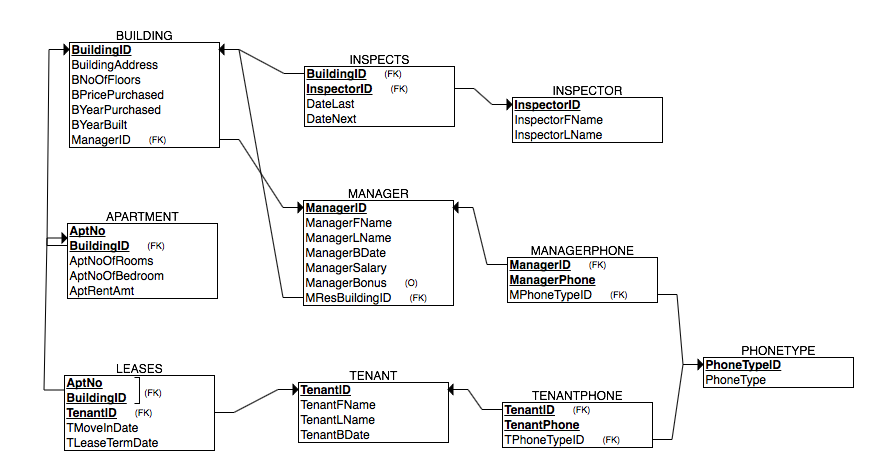

# Updated Code:

In [22]:
import pymysql.cursors
import pymysql

dsn_database = "neu_student"
dsn_hostname = "96.86.105.41"
dsn_port = 3306
dsn_uid = "neu"
dsn_pwd = "test"

conn = pymysql.connect(host=dsn_hostname, port=dsn_port, user=dsn_uid, passwd=dsn_pwd, db=dsn_database)

In [23]:
conn.query("""DROP SCHEMA IF EXISTS neu_student_zoe_pesce_labwork""")
conn.query("""CREATE SCHEMA neu_student_zoe_pesce_labwork""")
conn.query("""USE neu_student_zoe_pesce_labwork""")

conn.query("""DROP TABLE IF EXISTS leases, tenantphone, tenant, apartment, inspects, inspector, building, managerphone, manager, phonetype""")

conn.query("""CREATE TABLE phonetype (
  PhoneTypeID CHAR(1) NOT NULL,
  PhoneType VARCHAR(6) NOT NULL,
  PRIMARY KEY (PhoneTypeID)
)""")
conn.query("""CREATE TABLE manager
(
  ManagerID VARCHAR(5) NOT NULL,
  ManagerFName VARCHAR(20) NOT NULL,
  ManagerLName VARCHAR(20) NOT NULL,
  ManagerBDate Date NOT NULL,
  ManagerSalary Decimal(10,2) NOT NULL,
  ManagerBonus Decimal(10,2),
  MResBuildingID VARCHAR(5),
  PRIMARY KEY (ManagerID)
)""")
conn.query("""CREATE TABLE managerphone
(
  ManagerID VARCHAR(5) NOT NULL,
  ManagerPhone VARCHAR(14) NOT NULL,
  MPhoneType CHAR(1)NOT NULL,
  PRIMARY KEY (ManagerID, ManagerPhone),
  FOREIGN KEY (ManagerID) REFERENCES manager(ManagerID),
  FOREIGN KEY (MPhoneType) REFERENCES phonetype(PhoneTypeID)
)""")
conn.query("""CREATE TABLE building
(
  BuildingID VARCHAR(5) NOT NULL,
  BuildingAddress VARCHAR(60) NOT NULL,
  BNoOfFloors INT NOT NULL,
  BPricePurchased Decimal(10,2) NOT NULL,
  BYearPurchased Int NOT NULL,
  BYearBuilt INT NOT NULL,
  ManagerID VARCHAR(5) NOT NULL,
  PRIMARY KEY (BuildingID),
  FOREIGN KEY (ManagerID) REFERENCES manager(ManagerID)
)""")
conn.query("""CREATE TABLE inspector
(
  InspectorID VARCHAR(5) NOT NULL,
  InspectorFName VARCHAR(20) NOT NULL,
  InspectorLName VARCHAR(20) NOT NULL,
  PRIMARY KEY (InspectorID)
)""")
conn.query("""CREATE TABLE inspects
(
  BuildingID VARCHAR(5) NOT NULL,
  InspectorID VARCHAR(5) NOT NULL,
  DateLast Date NOT NULL,
  DateNext Date NOT NULL,
  PRIMARY KEY (BuildingID, InspectorID),
  FOREIGN KEY (BuildingID) REFERENCES building(BuildingID),
  FOREIGN KEY (InspectorID) REFERENCES inspector(InspectorID)
)""")
conn.query("""CREATE TABLE apartment
(
  BuildingID VARCHAR(5) NOT NULL,
  AptNo INT NOT NULL,
  AptNoOfRooms INT NOT NULL,
  AptNoOfBedroom INT NOT NULL,
  AptRentAmt Decimal(10,2) NOT NULL,
  PRIMARY KEY (BuildingID, AptNo),
  FOREIGN KEY (BuildingID) REFERENCES building(BuildingID)
)""")
conn.query("""CREATE TABLE tenant
(
  TenantID VARCHAR(5) NOT NULL,
  TenantFName VARCHAR(20) NOT NULL,
  TenantLName VARCHAR(20) NOT NULL,
  TenantBDate Date NOT NULL,
  PRIMARY KEY (TenantID)
)""")
conn.query("""CREATE TABLE tenantphone
(
  TenantID VARCHAR(5) NOT NULL,
  TenantPhone VARCHAR(14) NOT NULL,
  TPhoneType CHAR(1) NOT NULL,
  PRIMARY KEY (TenantID, TenantPhone),
  FOREIGN KEY (TenantID) REFERENCES tenant(TenantID),
  FOREIGN KEY (TPhoneType) REFERENCES phonetype(PhoneTypeID)
)""")
conn.query("""CREATE TABLE leases
(
  BuildingID VARCHAR(5) NOT NULL,
  AptNo INT NOT NULL,
  TenantID VARCHAR(5) NOT NULL,
  TMoveInDate Date NOT NULL,
  TLeaseTermDate Date NOT NULL,
  PRIMARY KEY (BuildingID, AptNo, TenantID),
  FOREIGN KEY (BuildingID, AptNo) REFERENCES apartment(BuildingID, AptNo),
  FOREIGN KEY (TenantID) REFERENCES tenant(TenantID)
)""")

0

In [24]:
conn.query("""INSERT INTO phonetype VALUES('M','Mobile')""")
conn.query("""INSERT INTO phonetype VALUES('H','Home')""")
conn.commit()
conn.query("""INSERT INTO manager (ManagerID, ManagerFName, ManagerLName, ManagerBDate, ManagerSalary, ManagerBonus) VALUES('M1','Tony','Hernandez','1979-06-10',73000.00,2500.00)""")
conn.query("""INSERT INTO manager (ManagerID, ManagerFName, ManagerLName, ManagerBDate, ManagerSalary, MResBuildingID) VALUES('M2','Dan','Pesce','1966-08-24',105000.00,'B1')""")
conn.commit()
conn.query("""INSERT INTO managerphone VALUES('M1','212-555-0810','M')""")
conn.query("""INSERT INTO managerphone VALUES('M1','212-555-1738','H')""")
conn.query("""INSERT INTO managerphone VALUES('M2','914-555-2555','H')""")
conn.query("""INSERT INTO managerphone VALUES('M2','914-555-6063','M')""")
conn.query("""INSERT INTO managerphone VALUES('M2','914-555-6510','M')""")
conn.commit()
conn.query("""INSERT INTO building VALUES('B1','30 Downing St. New York, NY 10014',6,2000000.00,2002,1901,'M2')""")
conn.query("""INSERT INTO building VALUES('B2','3242 Middletown Rd. Bronx, NY 10465',4,350000.00,1995,1932,'M1')""")
conn.query("""INSERT INTO building VALUES('B3','3244 Middletown Rd. Bronx, NY 10465',4,300000.00,1993,1932,'M1')""")
conn.query("""INSERT INTO building VALUES('B4','1628 Kennelworth Pl. Bronx, NY 10465',4,550000.00,2007,1921,'M1')""")
conn.query("""INSERT INTO building VALUES('B5','1634 Kennelworth Pl. Bronx, NY 10465',2,250000.00,2008,1947,'M1')""")
conn.query("""INSERT INTO building VALUES('B6','3268 Middletown Rd. Bronx, NY 10465',3,480000.00,2006,1935,'M1')""")
conn.commit()
conn.query("""INSERT INTO inspector VALUES('I1','John','Peabody')""")
conn.query("""INSERT INTO inspector VALUES('I2','Ralph','Eames')""")
conn.query("""INSERT INTO inspector VALUES('I3','Anthony','Zaro')""")
conn.commit()
conn.query("""INSERT INTO inspects VALUES('B1','I3','2017-03-15','2018-05-15')""")
conn.query("""INSERT INTO inspects VALUES('B2','I1','2017-04-01','2018-06-08')""")
conn.query("""INSERT INTO inspects VALUES('B3','I2','2017-02-15','2018-07-10')""")
conn.query("""INSERT INTO inspects VALUES('B4','I2','2017-08-17','2018-09-20')""")
conn.query("""INSERT INTO inspects VALUES('B5','I1','2017-10-26','2018-11-15')""")
conn.query("""INSERT INTO inspects VALUES('B6','I1','2017-09-18','2018-09-20')""")
conn.commit()
conn.query("""INSERT INTO apartment VALUES('B1',1,2,1,2500.00)""")
conn.query("""INSERT INTO apartment VALUES('B1',2,2,1,2500.00)""")
conn.query("""INSERT INTO apartment VALUES('B1',3,4,1,4500.00)""")
conn.query("""INSERT INTO apartment VALUES('B1',4,6,2,6500.00)""")
conn.query("""INSERT INTO apartment VALUES('B2',1,5,2,1600.00)""")
conn.query("""INSERT INTO apartment VALUES('B2',2,4,1,1250.00)""")
conn.query("""INSERT INTO apartment VALUES('B2',3,4,1,1200.00)""")
conn.query("""INSERT INTO apartment VALUES('B2',4,4,1,1250.00)""")
conn.query("""INSERT INTO apartment VALUES('B2',5,4,1,1475.00)""")
conn.query("""INSERT INTO apartment VALUES('B2',6,5,2,1600.00)""")
conn.query("""INSERT INTO apartment VALUES('B2',7,2,1,850.00)""")
conn.query("""INSERT INTO apartment VALUES('B3',1,6,2,1500.00)""")
conn.query("""INSERT INTO apartment VALUES('B3',2,4,1,1400.00)""")
conn.query("""INSERT INTO apartment VALUES('B3',3,4,1,1200.00)""")
conn.query("""INSERT INTO apartment VALUES('B3',4,4,1,1250.00)""")
conn.query("""INSERT INTO apartment VALUES('B3',5,4,1,950.00)""")
conn.query("""INSERT INTO apartment VALUES('B3',6,3,1,1300.00)""")
conn.query("""INSERT INTO apartment VALUES('B3',7,2,1,1100.00)""")
conn.query("""INSERT INTO apartment VALUES('B4',1,7,3,1800.00)""")
conn.query("""INSERT INTO apartment VALUES('B4',2,7,3,2000.00)""")
conn.query("""INSERT INTO apartment VALUES('B4',3,5,2,1600.00)""")
conn.query("""INSERT INTO apartment VALUES('B4',4,5,2,1750.00)""")
conn.query("""INSERT INTO apartment VALUES('B5',1,3,1,1500.00)""")
conn.query("""INSERT INTO apartment VALUES('B5',2,3,1,1300.00)""")
conn.query("""INSERT INTO apartment VALUES('B6',1,6,2,1600.00)""")
conn.query("""INSERT INTO apartment VALUES('B6',2,5,2,1350.00)""")
conn.query("""INSERT INTO apartment VALUES('B6',3,3,1,1300.00)""")
conn.query("""INSERT INTO apartment VALUES('B6',4,2,1,1100.00)""")
conn.commit()
conn.query("""INSERT INTO tenant VALUES('T1','Andrew','Pesce','1992-06-05')""")
conn.query("""INSERT INTO tenant VALUES('T2','Hannah','Pesce','1998-06-10')""")
conn.query("""INSERT INTO tenant VALUES('T3','Dan','Pesce','1966-08-24')""")
conn.query("""INSERT INTO tenant VALUES('T4','Lucia','Pesce','1967-03-25')""")
conn.query("""INSERT INTO tenant VALUES('T5','Rebecca','Johnson','1985-07-06')""")
conn.query("""INSERT INTO tenant VALUES('T6','Catherine','Turlington','1984-02-03')""")
conn.query("""INSERT INTO tenant VALUES('T7','Debbie','Freedman','1970-04-21')""")
conn.query("""INSERT INTO tenant VALUES('T8','Vivian','Charles','1962-07-20')""")
conn.query("""INSERT INTO tenant VALUES('T9','Tim','Arnold','1967-12-30')""")
conn.query("""INSERT INTO tenant VALUES('T10','Rita','Wright','1968-05-10')""")
conn.query("""INSERT INTO tenant VALUES('T11','Chris','Lloyd','1988-09-13')""")
conn.query("""INSERT INTO tenant VALUES('T12','Bill','Rogers','1965-08-04')""")
conn.query("""INSERT INTO tenant VALUES('T13','Carol','Coscia','1955-03-16')""")
conn.query("""INSERT INTO tenant VALUES('T14','Yvonne','Snell','1963-04-07')""")
conn.query("""INSERT INTO tenant VALUES('T15','Colleen','Smith','1982-10-10')""")
conn.query("""INSERT INTO tenant VALUES('T16','Nicholas','Cruz','1985-10-20')""")
conn.query("""INSERT INTO tenant VALUES('T17','Rudy','Rose','1977-02-18')""")
conn.query("""INSERT INTO tenant VALUES('T18','Milton','Mason','1964-06-22')""")
conn.query("""INSERT INTO tenant VALUES('T19','Jennifer','Apple','1961-01-25')""")
conn.query("""INSERT INTO tenant VALUES('T20','Tony','Cooke','1976-01-27')""")
conn.query("""INSERT INTO tenant VALUES('T21','Ashley','Bloomberg','1958-01-18')""")
conn.query("""INSERT INTO tenant VALUES('T22','Lizbeth','Simpson','1974-06-12')""")
conn.query("""INSERT INTO tenant VALUES('T23','Mario','Dutti','1966-11-19')""")
conn.query("""INSERT INTO tenant VALUES('T24','Manual','Perry','1983-12-03')""")
conn.query("""INSERT INTO tenant VALUES('T25','George','Clark','1981-08-29')""")
conn.query("""INSERT INTO tenant VALUES('T26','Peter','Pan','1982-09-10')""")
conn.query("""INSERT INTO tenant VALUES('T27','Emily','Bell','1983-03-14')""")
conn.query("""INSERT INTO tenant VALUES('T28','Chris','Cooper','1986-05-04')""")
conn.commit()
conn.query("""INSERT INTO tenantphone VALUES('T1','212-555-3245','M')""")
conn.query("""INSERT INTO tenantphone VALUES('T2','914-555-6509','M')""")
conn.query("""INSERT INTO tenantphone VALUES('T2','212-555-2555','H')""")
conn.query("""INSERT INTO tenantphone VALUES('T3','914-555-6063','M')""")
conn.query("""INSERT INTO tenantphone VALUES('T3','914-555-2555','H')""")
conn.query("""INSERT INTO tenantphone VALUES('T3','914-555-6510','M')""")
conn.query("""INSERT INTO tenantphone VALUES('T4','914-555-6684','M')""")
conn.query("""INSERT INTO tenantphone VALUES('T4','914-555-2555','H')""")
conn.query("""INSERT INTO tenantphone VALUES('T5','413-555-5687','M')""")
conn.query("""INSERT INTO tenantphone VALUES('T5','212-555-8006','H')""")
conn.query("""INSERT INTO tenantphone VALUES('T6','796-555-3475','M')""")
conn.query("""INSERT INTO tenantphone VALUES('T6','212-555-7468','H')""")
conn.query("""INSERT INTO tenantphone VALUES('T7','948-555-9302','M')""")
conn.query("""INSERT INTO tenantphone VALUES('T8','738-555-2835','M')""")
conn.query("""INSERT INTO tenantphone VALUES('T9','934-555-1029','M')""")
conn.query("""INSERT INTO tenantphone VALUES('T9','212-555-3927','H')""")
conn.query("""INSERT INTO tenantphone VALUES('T10','832-555-6930','M')""")
conn.query("""INSERT INTO tenantphone VALUES('T11','938-555-4830','M')""")
conn.query("""INSERT INTO tenantphone VALUES('T11','212-555-2234','H')""")
conn.query("""INSERT INTO tenantphone VALUES('T12','349-555-7730','M')""")
conn.query("""INSERT INTO tenantphone VALUES('T13','834-555-3928','M')""")
conn.query("""INSERT INTO tenantphone VALUES('T13','212-555-8854','H')""")
conn.query("""INSERT INTO tenantphone VALUES('T14','254-555-6054','M')""")
conn.query("""INSERT INTO tenantphone VALUES('T14','212-555-5936','H')""")
conn.query("""INSERT INTO tenantphone VALUES('T15','530-555-3928','M')""")
conn.query("""INSERT INTO tenantphone VALUES('T16','720-555-3948','M')""")
conn.query("""INSERT INTO tenantphone VALUES('T17','648-555-2039','M')""")
conn.query("""INSERT INTO tenantphone VALUES('T18','182-555-3759','M')""")
conn.query("""INSERT INTO tenantphone VALUES('T19','134-555-2261','M')""")
conn.query("""INSERT INTO tenantphone VALUES('T19','212-555-7993','H')""")
conn.query("""INSERT INTO tenantphone VALUES('T20','453-555-3344','M')""")
conn.query("""INSERT INTO tenantphone VALUES('T20','212-555-9952','H')""")
conn.query("""INSERT INTO tenantphone VALUES('T21','326-555-1284','M')""")
conn.query("""INSERT INTO tenantphone VALUES('T22','372-555-0384','M')""")
conn.query("""INSERT INTO tenantphone VALUES('T23','843-555-3027','M')""")
conn.query("""INSERT INTO tenantphone VALUES('T23','212-555-0674','H')""")
conn.query("""INSERT INTO tenantphone VALUES('T24','947-555-0384','M')""")
conn.query("""INSERT INTO tenantphone VALUES('T24','212-555-0085','H')""")
conn.query("""INSERT INTO tenantphone VALUES('T25','382-555-3221','M')""")
conn.query("""INSERT INTO tenantphone VALUES('T25','212-555-4038','H')""")
conn.query("""INSERT INTO tenantphone VALUES('T26','418-555-6748','M')""")
conn.query("""INSERT INTO tenantphone VALUES('T27','418-555-9744','M')""")
conn.query("""INSERT INTO tenantphone VALUES('T28','638-555-9853','M')""")
conn.commit()
conn.query("""INSERT INTO leases VALUES('B1',1,'T1','2016-06-01','2018-06-01')""")
conn.query("""INSERT INTO leases VALUES('B1',2,'T2','2016-08-01','2018-08-01')""")
conn.query("""INSERT INTO leases VALUES('B1',3,'T3','2009-03-01','2019-03-01')""")
conn.query("""INSERT INTO leases VALUES('B1',4,'T3','2015-03-01','2019-03-01')""")
conn.query("""INSERT INTO leases VALUES('B1',4,'T4','2015-03-01','2019-03-01')""")
conn.query("""INSERT INTO leases VALUES('B2',1,'T5','2016-08-01','2018-08-01')""")
conn.query("""INSERT INTO leases VALUES('B2',2,'T6','2015-05-01','2018-05-01')""")
conn.query("""INSERT INTO leases VALUES('B2',3,'T7','2008-04-01','2019-04-01')""")
conn.query("""INSERT INTO leases VALUES('B2',4,'T8','2015-02-01','2019-02-01')""")
conn.query("""INSERT INTO leases VALUES('B2',5,'T9','2017-10-01','2018-10-01')""")
conn.query("""INSERT INTO leases VALUES('B2',6,'T10','2016-07-01','2018-07-01')""")
conn.query("""INSERT INTO leases VALUES('B2',7,'T11','2017-08-01','2018-08-01')""")
conn.query("""INSERT INTO leases VALUES('B3',1,'T12','2010-04-01','2019-04-01')""")
conn.query("""INSERT INTO leases VALUES('B3',2,'T13','2014-07-01','2018-07-01')""")
conn.query("""INSERT INTO leases VALUES('B3',3,'T14','2015-04-01','2019-04-01')""")
conn.query("""INSERT INTO leases VALUES('B3',4,'T15','2016-05-01','2018-05-01')""")
conn.query("""INSERT INTO leases VALUES('B3',5,'T16','2015-09-01','2018-09-01')""")
conn.query("""INSERT INTO leases VALUES('B3',6,'T17','2014-04-01','2019-04-01')""")
conn.query("""INSERT INTO leases VALUES('B3',7,'T18','2015-07-01','2018-07-01')""")
conn.query("""INSERT INTO leases VALUES('B4',1,'T19','2015-03-01','2019-03-01')""")
conn.query("""INSERT INTO leases VALUES('B4',2,'T20','2015-05-01','2018-05-01')""")
conn.query("""INSERT INTO leases VALUES('B4',3,'T21','2017-10-01','2018-10-01')""")
conn.query("""INSERT INTO leases VALUES('B4',4,'T22','2016-11-01','2018-11-01')""")
conn.query("""INSERT INTO leases VALUES('B5',1,'T23','2018-03-01','2019-03-01')""")
conn.query("""INSERT INTO leases VALUES('B5',2,'T24','2017-04-01','2019-04-01')""")
conn.query("""INSERT INTO leases VALUES('B6',1,'T25','2017-05-01','2018-05-01')""")
conn.query("""INSERT INTO leases VALUES('B6',2,'T26','2006-04-01','2019-04-01')""")
conn.query("""INSERT INTO leases VALUES('B6',3,'T27','2017-01-01','2018-01-01')""")
conn.query("""INSERT INTO leases VALUES('B6',4,'T28','2018-04-01','2019-04-01')""")
conn.commit()

conn.query("""ALTER TABLE manager ADD CONSTRAINT fkresidesin FOREIGN KEY (MResBuildingID) REFERENCES building(BuildingID)""")

2

# Delete, Insert, Update Commands:

Delete | Tenant T28, Chris, got a new job in Massachusetts and is moving out. His information will be deleted from the DLZHP Property Management Database.

In [25]:
conn.query("""DELETE FROM tenantphone WHERE TenantID = 'T28'""")
conn.query("""DELETE FROM leases WHERE TenantID = 'T28'""")
conn.query("""DELETE FROM tenant WHERE TenantID = 'T28'""")
conn.commit()

Insert | A new Tenant, Sally, moves in to B6 Apt 4. She will become T28 and her information will be recorded in the DLZHP Property Management Database.

In [26]:
conn.query("""INSERT INTO tenant VALUES('T28','Sally','Stone','1980-11-13')""")
conn.query("""INSERT INTO tenantphone VALUES('T28','653-555-0126','M')""")
conn.query("""INSERT INTO tenantphone VALUES('T28','212-555-1818','H')""")
conn.query("""INSERT INTO leases VALUES('B6',4,'T28','2018-05-01','2019-05-01')""")
conn.commit()

Update | Hannah, T2, gets a family and friends discount on her rent and it is lowered to $2,000.00 a month.

In [27]:
conn.query("""UPDATE apartment SET AptRentAmt = 2000.00 WHERE BuildingID = 'B1' AND AptNo = 2""")
conn.commit()

# Select and Group By Commands:

Select | DLZHP LLC is considering lowering rents by 5% and would like to see what each apartment would rent for when AptRentAmt is decreased by 5% compared with what each apartment is currently renting for.

In [28]:
cursor=conn.cursor()

cursor.execute("""SELECT BuildingID, AptNo, AptRentAmt, AptRentAmt*0.95 FROM apartment""")

print ("\nShow Records:\n" "\nBuildingID, AptNo, AptRentAmt, AptRentAmt 5% Decrease\n")
rows = cursor.fetchall()
import pprint
pprint.pprint(rows)


Show Records:

BuildingID, AptNo, AptRentAmt, AptRentAmt 5% Decrease

(('B1', 1, Decimal('2500.00'), Decimal('2375.0000')),
 ('B1', 2, Decimal('2000.00'), Decimal('1900.0000')),
 ('B1', 3, Decimal('4500.00'), Decimal('4275.0000')),
 ('B1', 4, Decimal('6500.00'), Decimal('6175.0000')),
 ('B2', 1, Decimal('1600.00'), Decimal('1520.0000')),
 ('B2', 2, Decimal('1250.00'), Decimal('1187.5000')),
 ('B2', 3, Decimal('1200.00'), Decimal('1140.0000')),
 ('B2', 4, Decimal('1250.00'), Decimal('1187.5000')),
 ('B2', 5, Decimal('1475.00'), Decimal('1401.2500')),
 ('B2', 6, Decimal('1600.00'), Decimal('1520.0000')),
 ('B2', 7, Decimal('850.00'), Decimal('807.5000')),
 ('B3', 1, Decimal('1500.00'), Decimal('1425.0000')),
 ('B3', 2, Decimal('1400.00'), Decimal('1330.0000')),
 ('B3', 3, Decimal('1200.00'), Decimal('1140.0000')),
 ('B3', 4, Decimal('1250.00'), Decimal('1187.5000')),
 ('B3', 5, Decimal('950.00'), Decimal('902.5000')),
 ('B3', 6, Decimal('1300.00'), Decimal('1235.0000')),
 ('B3', 7, Deci

Group By | DLZHP LLC would like to see how many numbers they have recorded for each type of phone: mobile and home

In [29]:
cursor=conn.cursor()

cursor.execute("""SELECT TPhoneType, COUNT(*) FROM tenantphone GROUP BY TPhoneType""")

print ("\nShow Records:\n" "\n('TPhoneType', Count of TPhoneType)\n")
rows = cursor.fetchall()
import pprint
pprint.pprint(rows)


Show Records:

('TPhoneType', Count of TPhoneType)

(('H', 15), ('M', 29))


Extra Query: 

Join & Nested | Tony wants to throw a tenant appreciation party for B3 and would like a list of tenants who live in B3 that includes their full name, phone numbers, and phone types

In [30]:
cursor=conn.cursor()

cursor.execute("""SELECT t.TenantID, t.TenantFName, t.TenantLName, tp.TenantPhone, tp.TPhoneType, l.BuildingID 
FROM tenant t, tenantphone tp, leases l 
WHERE t.TenantID = tp.tenantID AND t.tenantID = l.TenantID AND l.TenantID IN (SELECT TenantID FROM leases WHERE BuildingID = 'B3')
ORDER BY l.TenantID""")

print ("\nShow Records:\n" "\n('TenantID', 'TenantFName', 'TenantLName', TenantPhone, 'TPhoneType', 'BuildingID')\n")
rows = cursor.fetchall()
import pprint
pprint.pprint(rows)


Show Records:

('TenantID', 'TenantFName', 'TenantLName', TenantPhone, 'TPhoneType', 'BuildingID')

(('T12', 'Bill', 'Rogers', '349-555-7730', 'M', 'B3'),
 ('T13', 'Carol', 'Coscia', '834-555-3928', 'M', 'B3'),
 ('T13', 'Carol', 'Coscia', '212-555-8854', 'H', 'B3'),
 ('T14', 'Yvonne', 'Snell', '254-555-6054', 'M', 'B3'),
 ('T14', 'Yvonne', 'Snell', '212-555-5936', 'H', 'B3'),
 ('T15', 'Colleen', 'Smith', '530-555-3928', 'M', 'B3'),
 ('T16', 'Nicholas', 'Cruz', '720-555-3948', 'M', 'B3'),
 ('T17', 'Rudy', 'Rose', '648-555-2039', 'M', 'B3'),
 ('T18', 'Milton', 'Mason', '182-555-3759', 'M', 'B3'))


In [31]:
conn.close()